In [13]:
import sys

import scprep

from matplotlib import rcParams
rcParams['font.family'] = 'sans-serif'
rcParams['font.sans-serif'] = ['Arial']


from scipy.spatial.distance import cosine, cdist, squareform, pdist
from sklearn import preprocessing
import seaborn as sns
import scprep
import phate
import graphtools as gt
from scipy.stats import zscore

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
phate.__version__

'0.3.1'

In [34]:
t_cell_data = pd.read_csv('/data/dan/burkhardt/blitz/CROP_seq/data_from_david/data/GSE92872_CROP-seq_Jurkat_TCR.digital_expression.csv.gz', header=None, skiprows=6, index_col=0).T
metadata = pd.read_csv('/data/dan/burkhardt/blitz/CROP_seq/data_from_david/data/GSE92872_CROP-seq_Jurkat_TCR.digital_expression.csv.gz', header=None, nrows=5, index_col=0).T



(-607.4500000000003, 26110.450000000004)


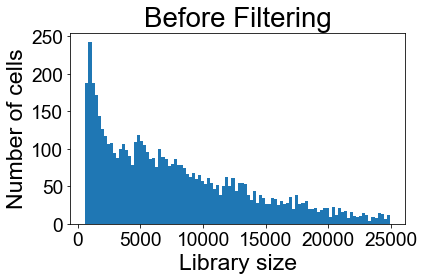

In [26]:
scprep.plot.plot_library_size(t_cell_data, log=False, title='Before Filtering',fontsize=16)

print(plt.xlim())
plt.tight_layout()
plt.savefig('/home/dan/burkhardt/blog/figs/libsize_example_normal.png', dpi=300, transparent=True)
plt.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/libsize_example_normal.png', dpi=300, transparent=True)

In [38]:
t_cell_data, library_size, metadata  = scprep.filter.filter_library_size(t_cell_data, metadata, cutoff=25000, keep_cells='below', return_library_size=True)


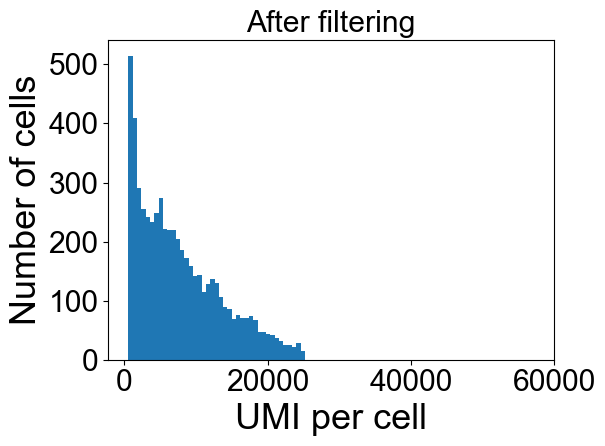

In [9]:
scprep.plot.plot_library_size(t_cell_data, range=(0,60000), log=False)
plt.xlabel('UMI per cell')
plt.ylabel('Number of cells')
plt.title('After filtering')

plt.xlim(-2219.9500000000003, 59972.95)
plt.tight_layout()
plt.savefig('/home/dan/burkhardt/blog/figs/libsize_example_filtered.png', dpi=300, transparent=True)
plt.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/libsize_example_filtered.png', dpi=300, transparent=True)

#### Filtering Rare Genes

In [40]:
genes_per_cell = np.sum(t_cell_data > 0, axis=0)

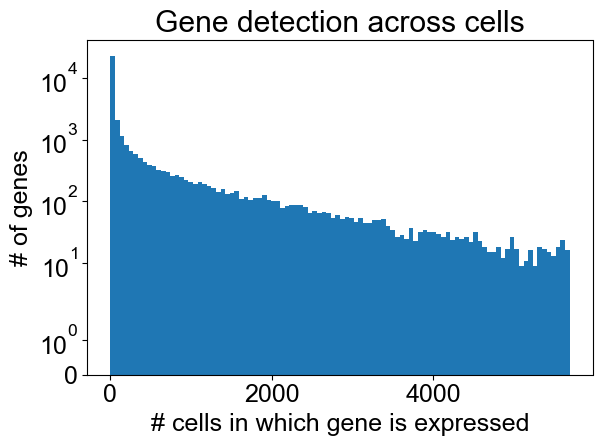

In [11]:
h = plt.hist(genes_per_cell, bins=100)
plt.xlabel('# cells in which gene is expressed')
plt.ylabel('# of genes')
plt.yscale('symlog')
plt.title('Gene detection across cells')
plt.tight_layout()
plt.savefig('../figs/gene_detection.png', dpi=300, transparent=True)
plt.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/gene_detection.png', dpi=300, transparent=True)

In [44]:
t_cell_data = scprep.filter.remove_rare_genes(t_cell_data, min_cells=10)

In [45]:
t_cell_data_ln = scprep.normalize.library_size_normalize(t_cell_data)

In [46]:
mitochondrial_gene_list = np.array([g.startswith('MT-') for g in t_cell_data_ln.columns])

mito_exp = t_cell_data_ln.loc[:,mitochondrial_gene_list].mean(axis=1)

#t_cell_data_ln = scprep.filter.filter_values(t_cell_data_ln, mito_exp, percentile=95, keep_cells='below')

idx = mito_exp < np.percentile(mito_exp, 95)
t_cell_data_ln = t_cell_data_ln[idx]
metadata = metadata[idx]
t_cell_data_ln.head()

0  A1BG  A1BG-AS1      AAAS  AACS     AADAT     AAED1  AAGAB      AAK1  AAMDC  \
1   0.0       0.0  0.000000   0.0  0.000000  0.000000    0.0  0.000000    0.0   
2   0.0       0.0  0.000000   0.0  0.000000  2.024726    0.0  4.049452    0.0   
3   0.0       0.0  0.000000   0.0  0.000000  0.000000    0.0  0.000000    0.0   
6   0.0       0.0  2.624341   0.0  0.000000  0.000000    0.0  0.000000    0.0   
9   0.0       0.0  0.000000   0.0  0.462402  0.000000    0.0  0.000000    0.0   

0      AAMP              ...               ZXDB  ZXDC  ZYG11B  ZYX  ZZEF1  \
1  0.000000              ...                0.0   0.0     0.0  0.0    0.0   
2  0.000000              ...                0.0   0.0     0.0  0.0    0.0   
3  0.000000              ...                0.0   0.0     0.0  0.0    0.0   
6  2.624341              ...                0.0   0.0     0.0  0.0    0.0   
9  0.000000              ...                0.0   0.0     0.0  0.0    0.0   

0  ZZZ3  bP-21201H5.1  bP-21264C1.2  bP-2189O9.2  chr22-38_28785274-29006793.1  
1   0.0           0.0           0.0          0.0                           0.0  
2   0.0           0.0           0.0          0.0                           0.0  
3   0.0           0.0           0.0          0.0                           0.0  
6   0.0           0.0           0.0          0.0                           0.0  
9   0.0           0.0           0.0          0.0                           0.0  

[5 rows x 20508 columns]

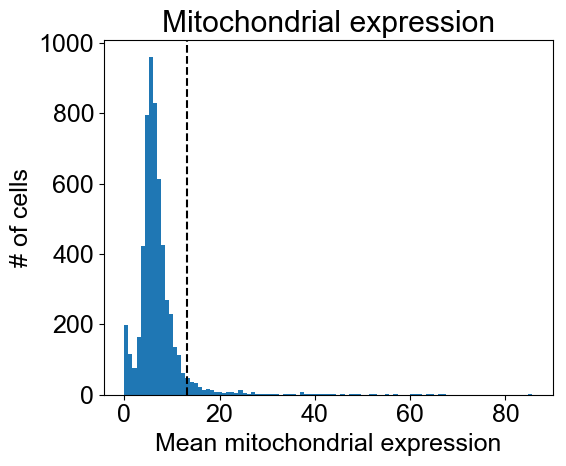

In [20]:
fig, ax = plt.subplots(1, figsize=(6,5))

ax.hist(mito_exp, bins=100)
ax.axvline(np.percentile(mito_exp, 95), color='k', linestyle='--')
ax.set_xlabel('Mean mitochondrial expression')
ax.set_ylabel('# of cells')
ax.set_title('Mitochondrial expression')

fig.tight_layout()

fig.savefig('../figs/mito_expression.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/mito_expression.png', dpi=300, transparent=True)

In [ ]:
signature_genes = np.genfromtxt('/home/dan/burkhardt/meld/CROP_seq/files/signature_genes.txt', dtype=str)


In [ ]:
from scipy import stats

In [ ]:
data_zs = stats.zscore(t_cell_data_ln, axis=0)

In [ ]:
import sys
sys.setrecursionlimit(10000)

In [ ]:
cg = sns.clustermap(data_zs[:1000,:2000], vmax=2, cmap='RdBu_r')

cg.ax_heatmap.set_yticks([])
cg.ax_heatmap.set_xticks([])

cg.ax_heatmap.set_xlabel('Genes ({})'.format(data_zs.shape[1]))
cg.ax_heatmap.set_ylabel('Cells ({})'.format(data_zs.shape[0]))

cg.ax_heatmap.set_title('Z-scored gene expression')

cg.savefig('../figs/datlinger_heatmap.png', transparent=True, dpi=300)
cg.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger_heatmap.png', transparent=True, dpi=300)

In [ ]:
sns.pairplot(t_cell_data_ln.loc[:,signature_genes[:10]])
plt.tight_layout()
plt.savefig('/home/dan/burkhardt/blog/figs/datlinger_pairplot.png', dpi=300, transparent=True)
plt.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger_pairplot.png', dpi=300, transparent=True)

#### PCA

In [47]:
t_cell_data_sq = scprep.transform.sqrt(t_cell_data_ln)

In [48]:
tcell_data_pcs = scprep.reduce.pca(t_cell_data_sq, n_components=100)

In [23]:
from sklearn.decomposition import PCA

In [24]:
pc_op = PCA()
t_cell_data_pcs = pc_op.fit_transform(scprep.transform.sqrt(t_cell_data_ln))

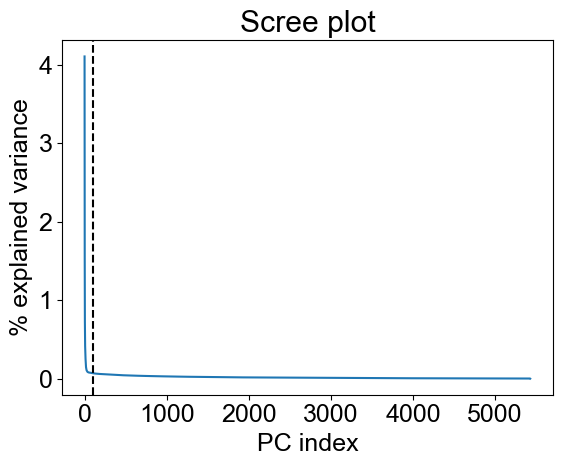

In [25]:
fig, ax = plt.subplots(1, figsize=(6,5))

ax.plot(pc_op.explained_variance_/pc_op.explained_variance_.sum() * 100)
ax.axvline(100, c='k', linestyle='--')
ax.set_xlabel('PC index')
ax.set_ylabel('% explained variance')
ax.set_title('Scree plot')

fig.tight_layout()

plt.savefig('/home/dan/burkhardt/blog/figs/datlinger_screeplot.png', dpi=300, transparent=True)
plt.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger_screeplot.png', dpi=300, transparent=True)

In [26]:
pc_op.explained_variance_.cumsum()[100]/pc_op.explained_variance_.sum()

0.19662410958965654

In [27]:
pc_op.explained_variance_.cumsum()[500]/pc_op.explained_variance_.sum()

0.4053326377307423

Text(0, 0.5, 'PC 101 Magnitude')

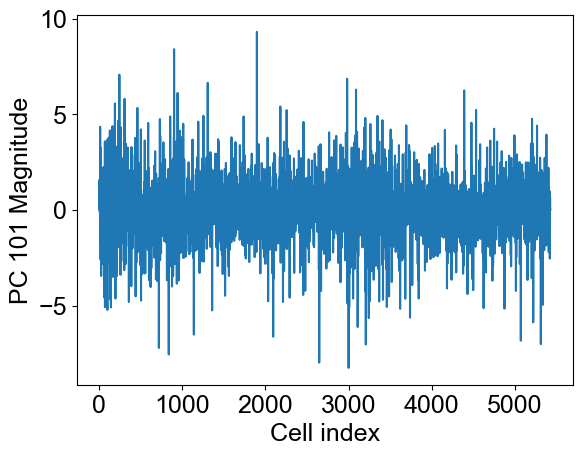

In [28]:
plt.plot(t_cell_data_pcs[:,101])
plt.xlabel('Cell index')
plt.ylabel('PC 101 Magnitude')

In [29]:
stim = t_cell_data_ln.index.get_level_values('condition')

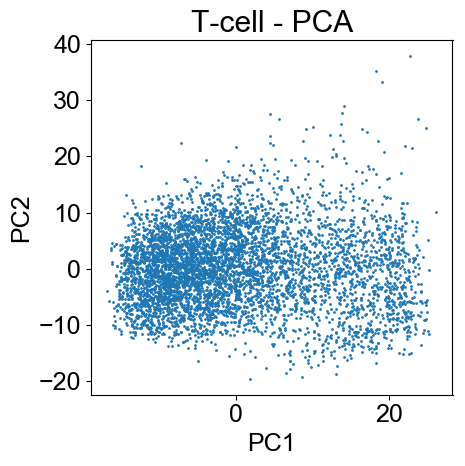

In [30]:
fig, ax = plt.subplots(1, figsize=(5,5))

ax.scatter(t_cell_data_pcs[:,0], t_cell_data_pcs[:,1], s=1)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('T-cell - PCA')

fig.tight_layout()

fig.savefig('/home/dan/burkhardt/blog/figs/datlinger.PCA.nocolor.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.PCA.nocolor.png', dpi=300, transparent=True)

In [31]:
stim = t_cell_data_ln.index.get_level_values('condition')
condition_cdict = {'stimulated':'#1a3263',
                   'unstimulated':'#f5564e'}
condition_cvec  = np.array([condition_cdict[cond] for cond in stim])

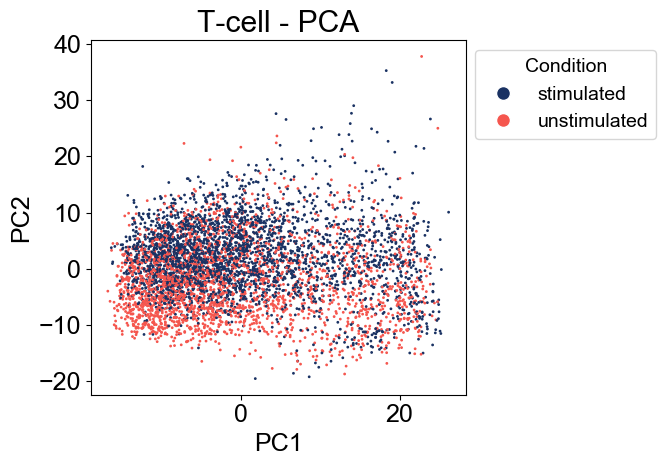

In [32]:
fig, ax = plt.subplots(1, figsize=(7,5))

r = dbio.shuffle_idx(t_cell_data_pcs)

ax.scatter(t_cell_data_pcs[:,0][r], t_cell_data_pcs[:,1][r], s=1, c=condition_cvec[r])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('T-cell - PCA')

dbio.generate_legend(condition_cdict, ax, title='Condition', bbox_to_anchor=(1,1))

fig.tight_layout()


fig.savefig('/home/dan/burkhardt/blog/figs/datlinger.PCA.condition.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.PCA.condition.png', dpi=300, transparent=True)

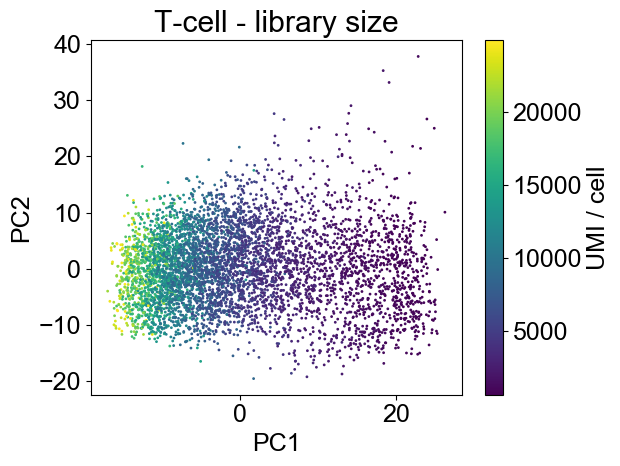

In [33]:
fig, ax = plt.subplots(1, figsize=(6.5,5))

sc = ax.scatter(t_cell_data_pcs[:,0], t_cell_data_pcs[:,1], s=1, c=libsize)
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_title('T-cell - library size')

cbar = fig.colorbar(sc, ax=ax)
cbar.ax.set_ylabel('UMI / cell')

fig.tight_layout()


fig.savefig('/home/dan/burkhardt/blog/figs/datlinger.PCA.libsize.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.PCA.libsize.png', dpi=300, transparent=True)

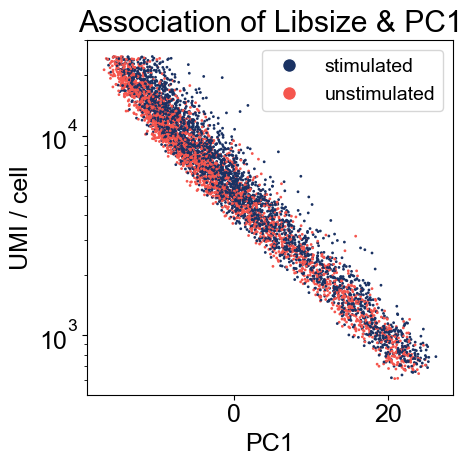

In [34]:
fig, ax = plt.subplots(1, figsize=(5,5))

r = dbio.shuffle_idx(t_cell_data_pcs)
ax.scatter(t_cell_data_pcs[:,0][r], libsize[r], c=condition_cvec[r], s=1)
ax.set_yscale('log')
ax.set_ylabel('UMI / cell')
ax.set_xlabel('PC1')
ax.set_title('Association of Libsize & PC1')

fig.tight_layout()

dbio.generate_legend(condition_cdict, ax)

fig.savefig('/home/dan/burkhardt/blog/figs/datlinger.PCA.pc1_vs_libsize.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.PCA.pc1_vs_libsize.png', dpi=300, transparent=True)

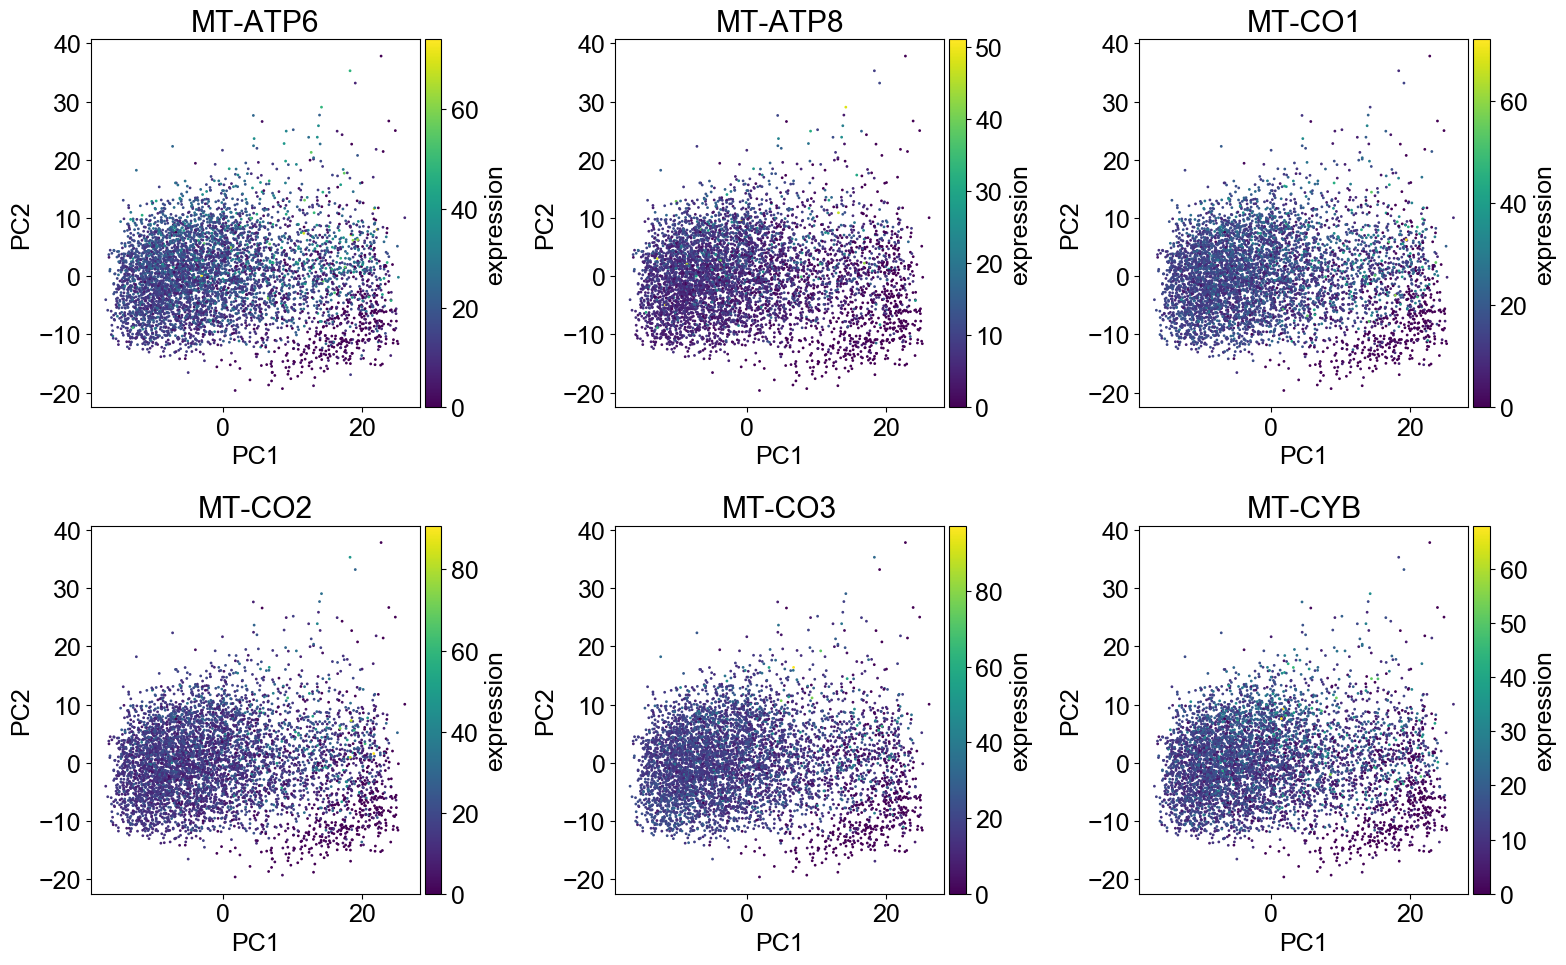

In [35]:
fig, axes = plt.subplots(2,3, figsize=(16,10))
axes = axes.flatten()

mito_genes = scprep.utils.get_gene_set(t_cell_data_ln, starts_with='MT-')

for i, ax in enumerate(axes):
    exp = t_cell_data_ln[mito_genes[i]]
    sc = ax.scatter(t_cell_data_pcs[:,0], t_cell_data_pcs[:,1], s=1, c=exp)
    ax.set_xlabel('PC1')
    ax.set_ylabel('PC2')
    ax.set_title(mito_genes[i])
    
    cbar = fig.colorbar(sc, cax=dbio.get_cbar_ax(ax))
    cbar.ax.set_ylabel('expression')

fig.tight_layout()

fig.savefig('/home/dan/burkhardt/blog/figs/datlinger.PCA.mito_exp.png', dpi=300, transparent=True)
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.PCA.mito_exp.png', dpi=300, transparent=True)

#### PHATE

In [49]:
import phate

In [50]:
phate.PHATE()

PHATE(a=40, alpha_decay=None, gamma=1, k=5, knn_dist='euclidean',
   mds='metric', mds_dist='euclidean', n_components=2, n_jobs=1,
   n_landmark=2000, n_pca=100, njobs=None, potential_method=None,
   random_state=None, t='auto', verbose=1)

In [51]:
phate_op = phate.PHATE(n_jobs=16)

Y = phate_op.fit_transform(tcell_data_pcs)

Calculating PHATE...
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 2.55 seconds.
    Calculating affinities...
    Calculated affinities in 0.22 seconds.
  Calculated graph and diffusion operator in 2.79 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.75 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.80 seconds.
  Calculated landmark operator in 19.04 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 0.92 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.46 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 69.56 seconds.
Calculated PHATE in 92.78 seconds.


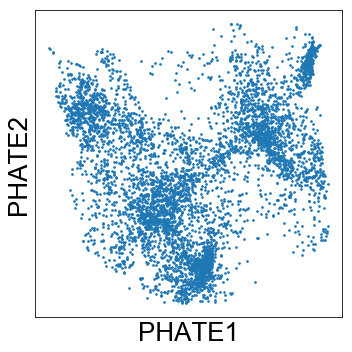

In [55]:
ax = scprep.plot.scatter2d(Y, ticks=None, label_prefix='PHATE', figsize=(5,5), fontsize=18)
ax.figure.tight_layout()
ax.figure.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.tcell.nocolor.png', dpi=300, transparent=True)

In [58]:
import dbio

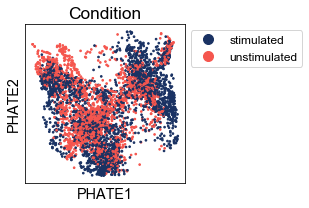

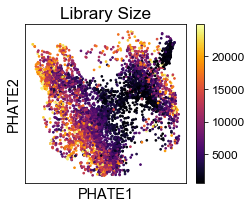

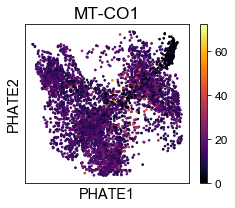

In [82]:
# Plotting condition label
fig, ax = plt.subplots(1, figsize=(4.4,3))
condition_cdict = {'stimulated':'#1a3263',
                   'unstimulated':'#f5564e'}
scprep.plot.scatter2d(Y, ax=ax, c=metadata['condition'], cmap=condition_cdict, 
                      title='Condition', ticks=False, label_prefix='PHATE',
                     legend_anchor=(1,1))
fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.tcell.condition.png', dpi=300, transparent=True)

# Plotting libsize
fig, ax = plt.subplots(1, figsize=(3.6,3))
scprep.plot.scatter2d(Y, ax=ax, c=metadata['library_size'], title='Library Size', ticks=False, label_prefix='PHATE')
fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.tcell.libsize.png', dpi=300, transparent=True)


# Plotting mitochondrial expression
fig, ax = plt.subplots(1, figsize=(3.4,3))
scprep.plot.scatter2d(Y, ax=ax, c=t_cell_data_ln['MT-CO1'], title='MT-CO1', ticks=False, label_prefix='PHATE')
fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.tcell.MT-CO1.png', dpi=300, transparent=True)


In [93]:
clusters = phate.cluster.kmeans(phate_op, k=5)



/usr/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


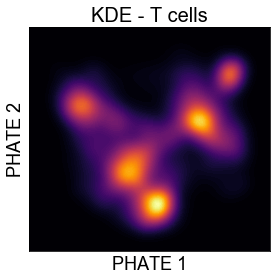

In [92]:
import seaborn as sns

fig, ax = plt.subplots(1, figsize=(4,4))
sns.kdeplot(Y[:,0], Y[:,1], n_levels=100, shade=True, cmap='inferno', zorder=0, ax=ax)

ax.set_xticks([])
ax.set_yticks([])

ax.set_xlabel('PHATE 1', fontsize=18)
ax.set_ylabel('PHATE 2', fontsize=18)

ax.set_title('KDE - T cells', fontsize=20)

fig.tight_layout()
fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.KDE.tcell.png', 
            dpi=300, transparent=True)


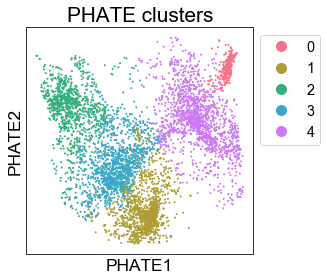

In [105]:
clusters = phate.cluster.kmeans(phate_op, k=5)

ax = scprep.plot.scatter2d(Y, c=clusters, cmap=sns.husl_palette(5), s=1, 
                      figsize=(4.65,4), ticks=None, label_prefix='PHATE',
                     legend_anchor=(1,1), fontsize=12, title='PHATE clusters')

fig = ax.figure
fig.tight_layout()

fig.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/PHATE.tcell.clusters.png', 
            dpi=300, transparent=True)

In [78]:
cluster_cmap = {c:sns.husl_palette(len(np.unique(clusters)))[i] for i,c in enumerate(np.unique(clusters))}
cluster_cvec = np.array([cluster_cmap[c] for c in clusters])

In [84]:
np.argsort(clusters)

array([   0, 3005, 5019, ..., 3360, 3362, 3306])

In [88]:
import graphtools as gt

In [91]:
G = gt.Graph(t_cell_data_sq, n_pca=100, knn=5, decay=40)

In [92]:
t_cell_data_mg = G.diff_op @ t_cell_data_sq

In [94]:
import scipy.stats

In [96]:
data_mg_zs = scipy.stats.zscore(t_cell_data_mg, axis=0)

In [104]:
short_sig = ['ANXA1', 'PTPRC', 'CD28','CD3D','SOX4','ZFP36L2','ZFP36L1', 'MYB','JARID2','CD28','GATA3','HLA-E', 'UHRF1','MYC','USP1','ESCO2',
'GATA3','SOX4', 'HSPA5','DDIT3','HSP90B1']

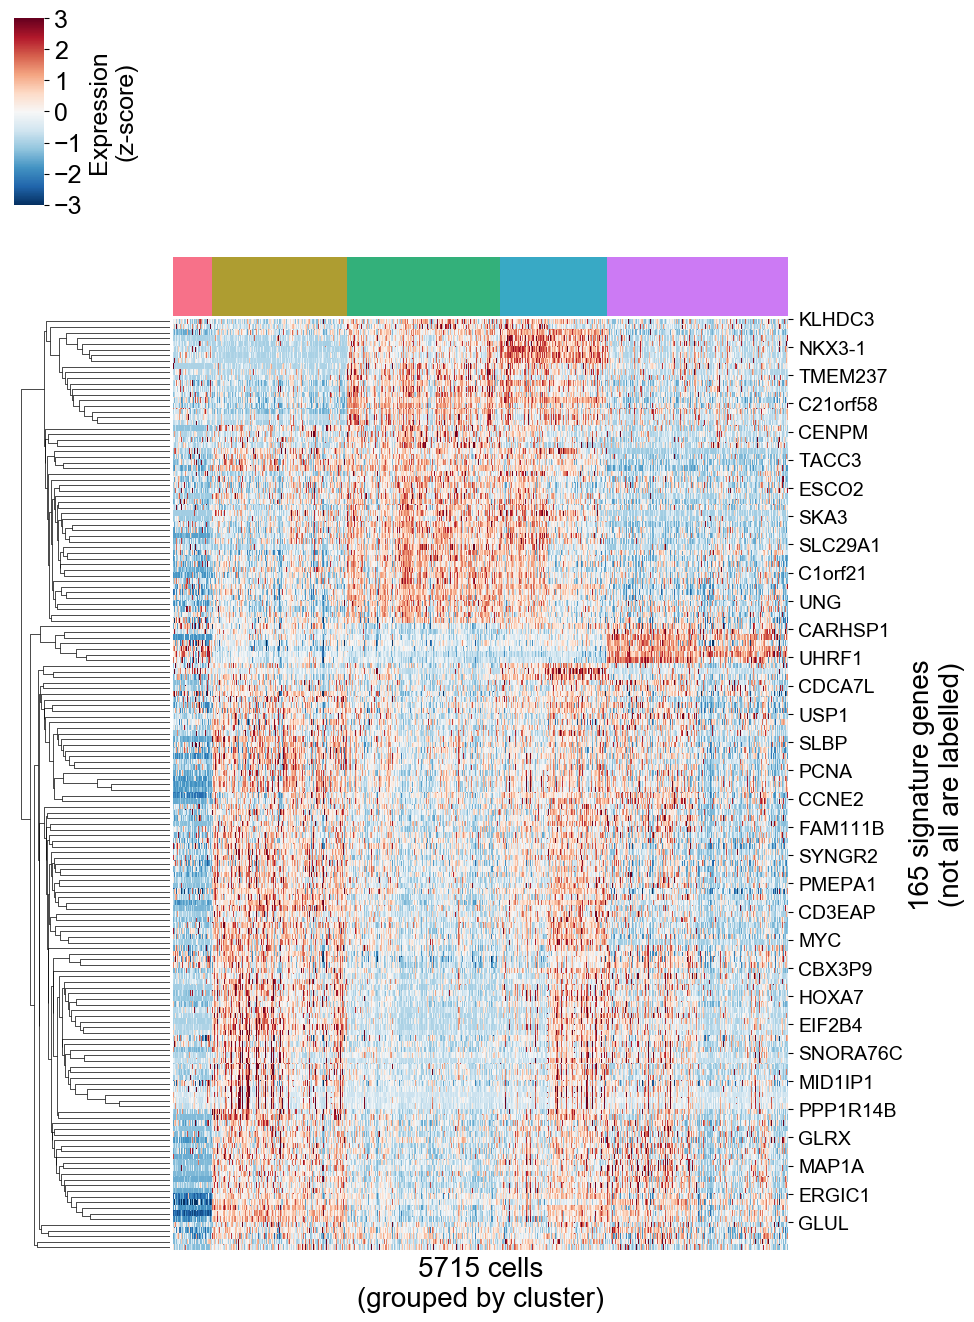

In [120]:
cg= sns.clustermap(data_mg_zs[np.argsort(clusters)][:, np.isin(t_cell_data_ln.columns.values, signature_genes)].T,                
               col_colors=cluster_cvec[np.argsort(clusters)], col_cluster=False, vmax=3, vmin=-3, cmap='RdBu_r', yticklabels=t_cell_data_ln.columns.values[np.isin(t_cell_data_ln.columns.values, signature_genes)])

cg.ax_heatmap.set_yticks(np.arange(0, len(signature_genes), step=5))
cg.ax_heatmap.set_yticklabels(cg.ax_heatmap.get_yticklabels(), fontsize=14)
cg.fig.set_size_inches(10,16)

cg.ax_heatmap.set_ylabel('165 signature genes\n(not all are labelled)', fontsize=20)
cg.ax_heatmap.set_xticks([])
cg.ax_heatmap.set_xlabel('{} cells\n(grouped by cluster)'.format(t_cell_data.shape[0]), fontsize=20)

cg.cax.set_ylabel('Expression\n(z-score)')
cg.savefig('/home/dan/burkhardt/blog/figs/datlinger.clusters_expression_heatmap.png', dpi=300, transparent=True)
cg.savefig('/home/dan/docs/websites/ksl_academic/static/img/how_to_single_cell/datlinger.clusters_expression_heatmap.png', dpi=300, transparent=True)

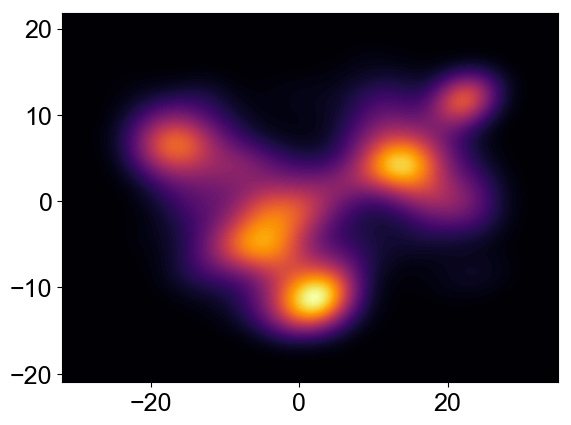

In [73]:
ax = sns.kdeplot(Y[:,0], Y[:,1], n_levels=100,shade=True, cmap='inferno')
ax.scatter()

In [40]:
genes = ['RFC4', 'MCM6', 'UBE2C', 'CDK6']
for g in genes:
    if not g in t_cell_data_ln.columns:
        print(g)

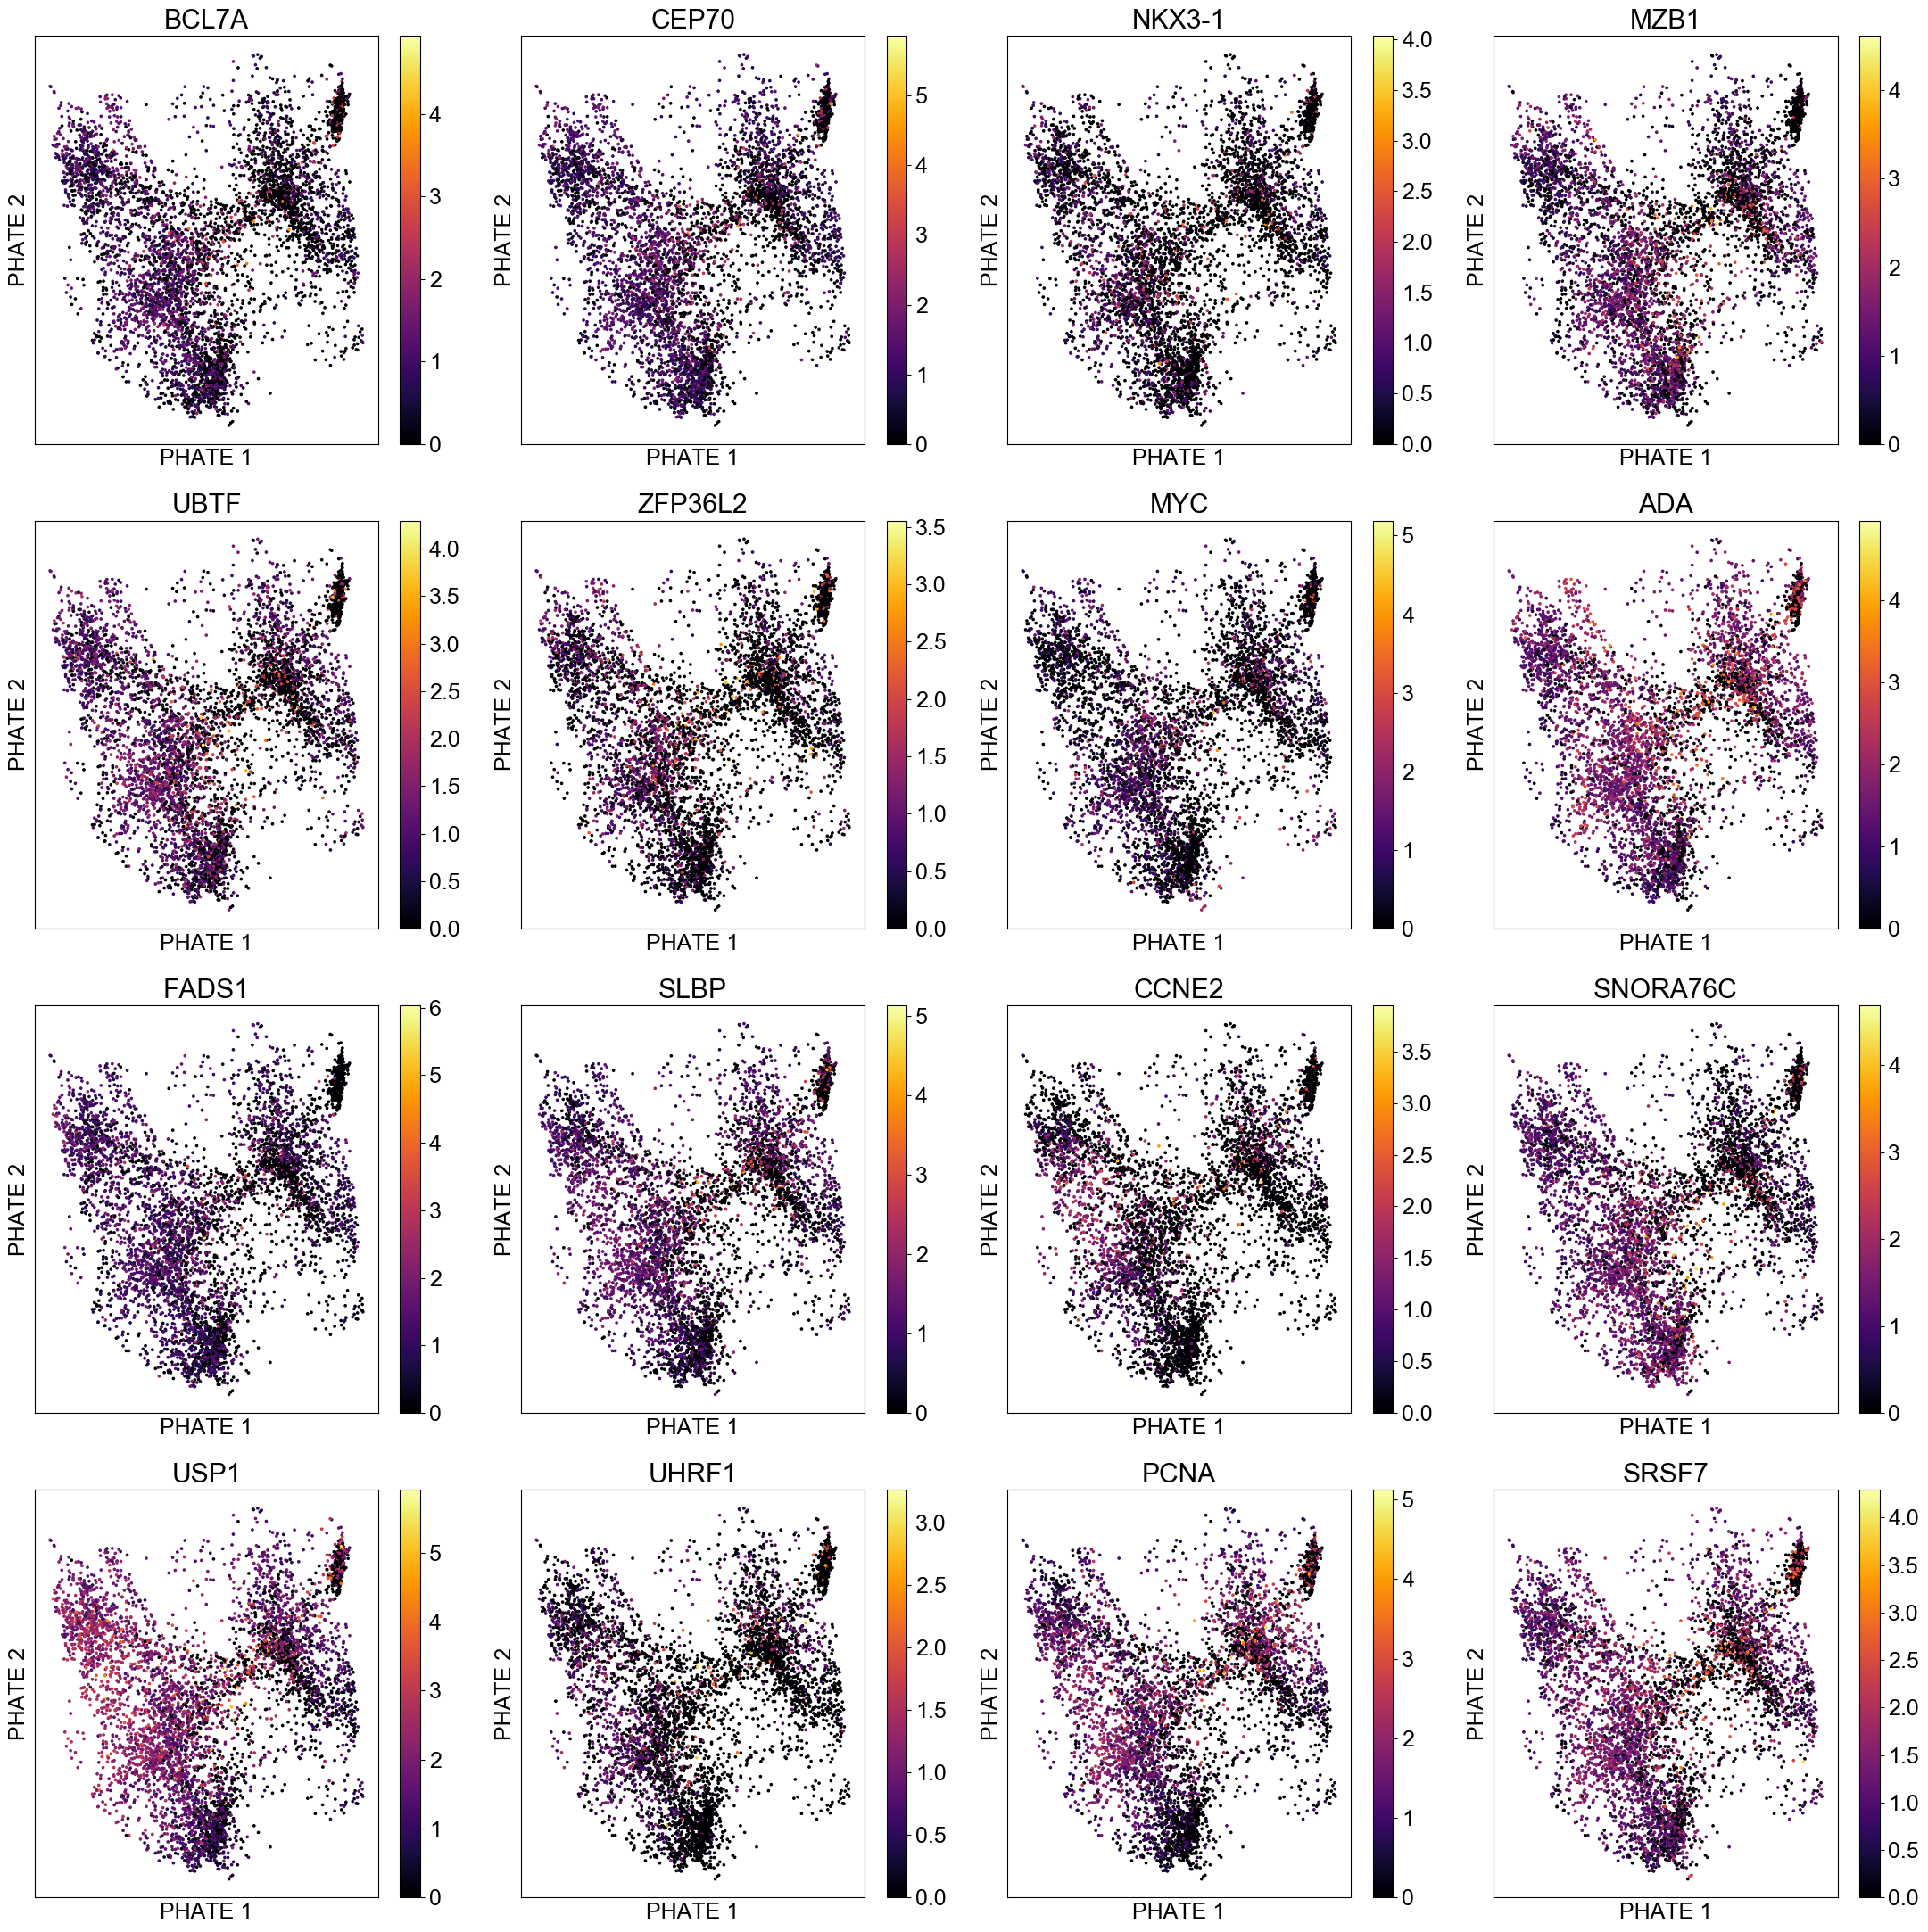

In [68]:
genes = signature_genes[:16]

fig, axes = plt.subplots(4,4, figsize=(22,22))
axes = axes.flatten()
for i, g in enumerate(genes):
    ax = axes[i]
    scprep.plot.scatter2d(Y, ax=ax, c=np.sqrt(t_cell_data_ln[g]), title=g, legend=True)
    dbio.style_phate(ax)
    ax.set_title(g)
fig.tight_layout()

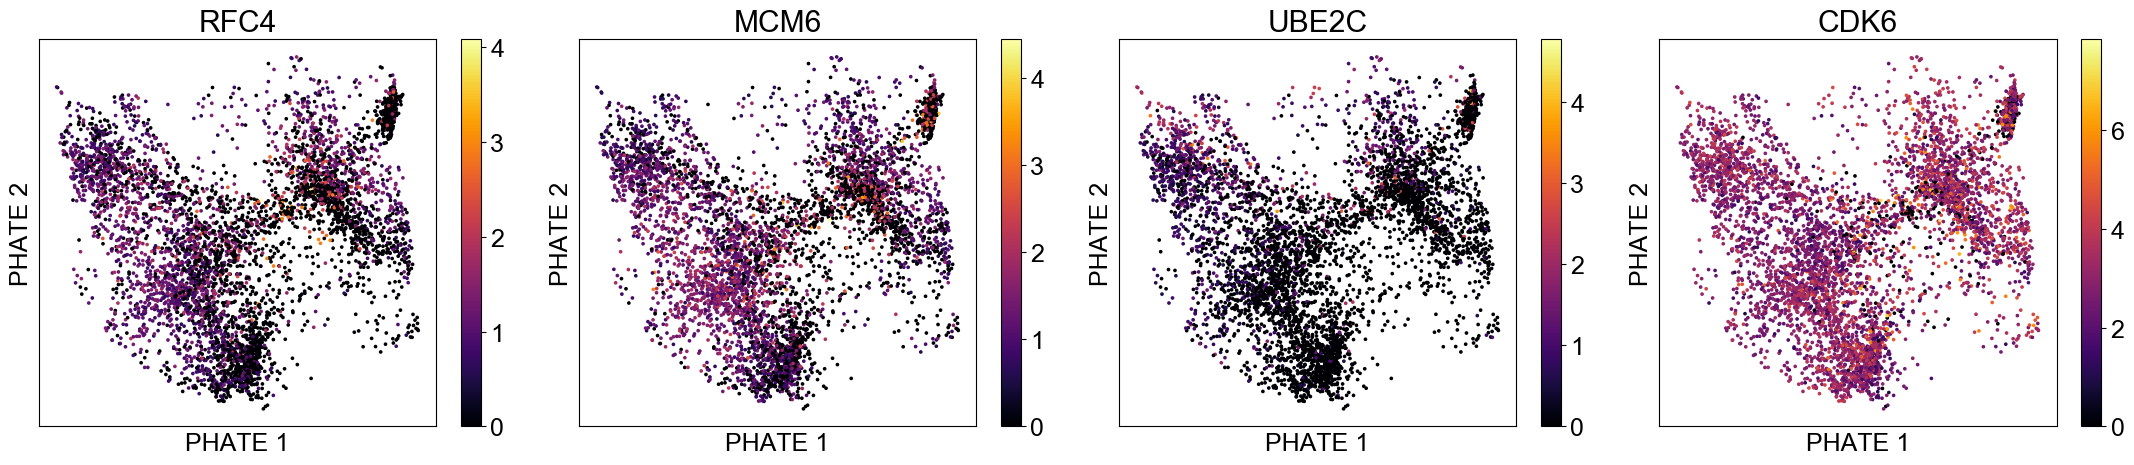

In [56]:
genes = ['RFC4', 'MCM6', 'UBE2C', 'CDK6', ]

fig, axes = plt.subplots(1,4, figsize=(22,5))
axes = axes.flatten()
for i, g in enumerate(genes):
    ax = axes[i]
    scprep.plot.scatter2d(Y, ax=ax, c=np.sqrt(t_cell_data_ln[g]), title=g, legend=True)
    dbio.style_phate(ax)
    ax.set_title(g)
fig.tight_layout()

In [58]:
stim == 'stimulated'

Index(['stimulated', 'stimulated', 'stimulated', 'stimulated', 'stimulated',
       'stimulated', 'stimulated', 'stimulated', 'stimulated', 'stimulated',
       ...
       'unstimulated', 'unstimulated', 'unstimulated', 'unstimulated',
       'unstimulated', 'unstimulated', 'unstimulated', 'unstimulated',
       'unstimulated', 'unstimulated'],
      dtype='object', name='condition', length=5429)

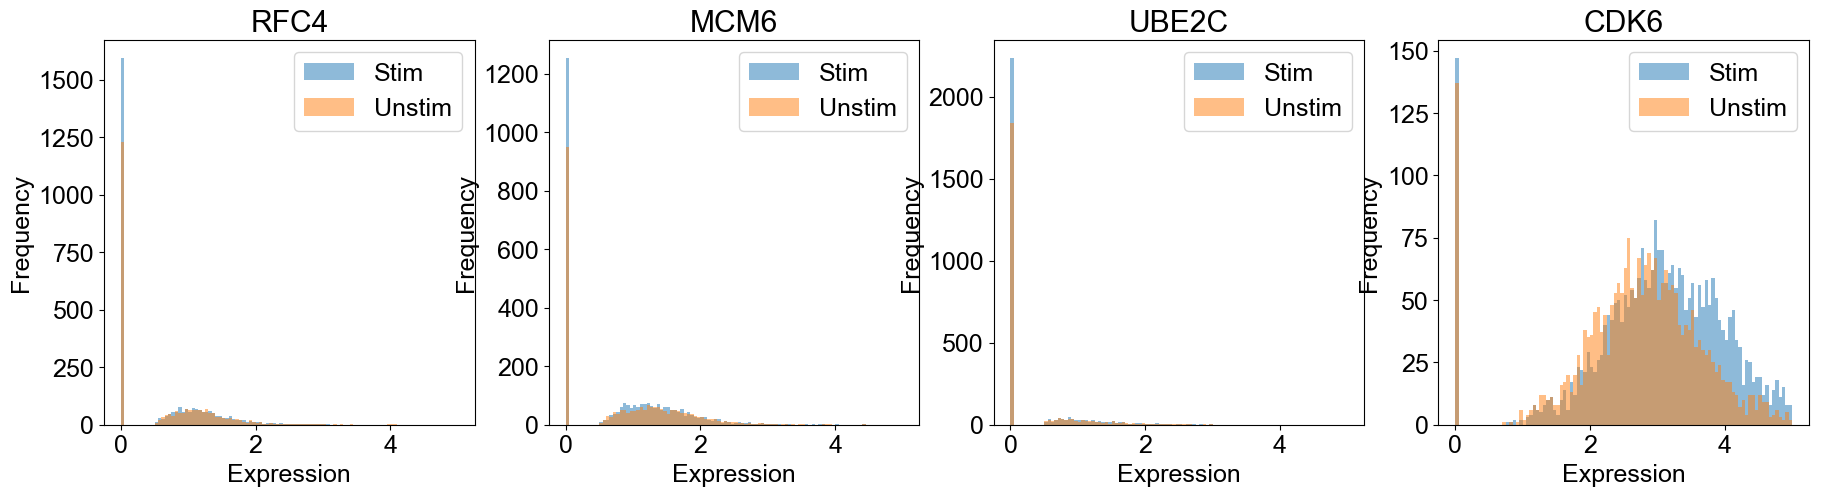

In [65]:
genes = ['RFC4', 'MCM6', 'UBE2C', 'CDK6']

fig, axes = plt.subplots(1,4, figsize=(22,5))
axes = axes.flatten()
for i, g in enumerate(genes):
    ax = axes[i]
    ax.hist(np.sqrt(t_cell_data_ln[g][stim == 'stimulated']), bins=100, range=(0,5), alpha=0.5, label='Stim')
    ax.hist(np.sqrt(t_cell_data_ln[g][stim == 'unstimulated']), bins=100, range=(0,5), alpha=0.5, label='Unstim')
    ax.legend()
    ax.set_title(g)
    ax.set_xlabel('Expression')
    ax.set_ylabel('Frequency')


Calculating PHATE...
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.95 seconds.
    Calculating affinities...
    Calculated affinities in 0.24 seconds.
  Calculated graph and diffusion operator in 2.21 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 0.71 seconds.
    Calculating KMeans...
    Calculated KMeans in 17.97 seconds.
  Calculated landmark operator in 19.98 seconds.
  Calculating optimal t...
    Automatically selected t = 28
  Calculated optimal t in 0.84 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.27 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 16.69 seconds.
Calculated PHATE in 40.00 seconds.


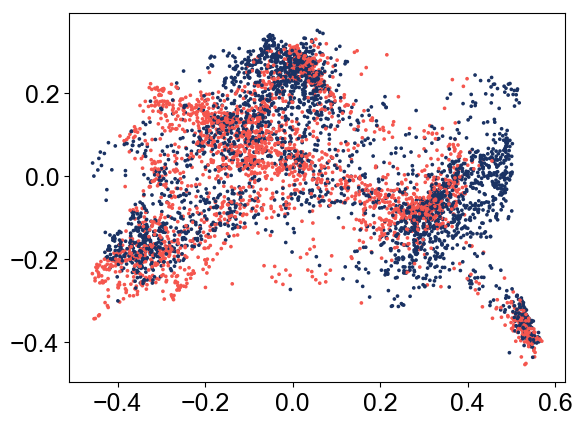

In [37]:
phate_op = phate.PHATE(n_jobs=16, gamma=0)

Y = phate_op.fit_transform(t_cell_data_pcs[:,:100])
scprep.plot.scatter2d(Y, c=condition_cvec, title='gamma=0')

Calculating PHATE...
  Calculating graph and diffusion operator...
    Calculating KNN search...
    Calculated KNN search in 1.96 seconds.
    Calculating affinities...
    Calculated affinities in 0.73 seconds.
  Calculated graph and diffusion operator in 2.78 seconds.
  Calculating landmark operator...
    Calculating SVD...
    Calculated SVD in 4.51 seconds.
    Calculating KMeans...
    Calculated KMeans in 16.93 seconds.
  Calculated landmark operator in 23.00 seconds.
  Calculating optimal t...
    Automatically selected t = 20
  Calculated optimal t in 0.90 seconds.
  Calculating diffusion potential...
  Calculated diffusion potential in 0.23 seconds.
  Calculating metric MDS...
  Calculated metric MDS in 19.94 seconds.
Calculated PHATE in 46.87 seconds.


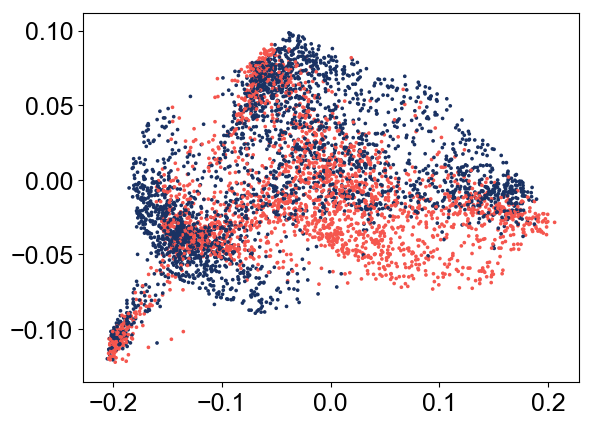

In [39]:
phate_op = phate.PHATE(n_jobs=16, gamma=0, k=15, a=20)

Y = phate_op.fit_transform(t_cell_data_pcs[:,:100])
scprep.plot.scatter2d(Y, c=condition_cvec, title='k=15, a=20, gamma=0')